## Gibbs sampling for 2D posterior

We will first derive a Gibbs sampler by deriving the full conditional distributions. Then, we will describe a method to estimate marginal likelihoods using the Gibbs output.

Consider the following probabilistic model:

$$
p(x_1) = \mathcal{N}(x_1; \mu_1, \sigma_1^2),
$$

$$
p(x_2) = \mathcal{N}(x_2; \mu_2, \sigma_2^2),
$$

$$
p(y \mid x_1, x_2) = \mathcal{N}(y; x_1 + x_2, \sigma_y^2),
$$

where:

- $y$ is a scalar observation,
- $x_1, x_2$ are latent variables.

This is a simple model where we observe the **sum of two random variables** and want to construct possible values of $x_1$ and $x_2$ given the observation $y$.

We derive the Gibbs sampler by deriving the full conditional distributions $p(x_1 \mid x_2, y)$ and $p(x_2 \mid x_1, y)$.

We start from

$$
p(x_1 \mid x_2, y) \propto p(y \mid x_1, x_2)\,p(x_1, x_2).
$$

Since $x_1$ and $x_2$ are independent a priori,

$$
p(x_1, x_2) = p(x_1)p(x_2)
= \frac{1}{2\pi\sigma_1\sigma_2}
\exp\left(
-\frac{1}{2}
\left[
\left(\frac{x_1-\mu_1}{\sigma_1}\right)^2
+
\left(\frac{x_2-\mu_2}{\sigma_2}\right)^2
\right]
\right).
$$

The likelihood is

$$
p(y \mid x_1, x_2)
=
\frac{1}{\sigma_y\sqrt{2\pi}}
\exp\left(
-\frac{1}{2}
\left(
\frac{y-(x_1+x_2)}{\sigma_y}
\right)^2
\right).
$$

Hence,

$$
p(x_1 \mid x_2, y)
\propto
\exp\left(
-\frac{1}{2}
\left(
\frac{y-(x_1+x_2)}{\sigma_y}
\right)^2
-
\frac{1}{2}
\left[
\left(\frac{x_1-\mu_1}{\sigma_1}\right)^2
+
\left(\frac{x_2-\mu_2}{\sigma_2}\right)^2
\right]
\right).
$$

Expanding and keeping only terms involving $x_1$:

$$
p(x_1 \mid x_2, y)
\propto
\exp\left(
-\frac{1}{2}
\left(
\frac{1}{\sigma_y^2} + \frac{1}{\sigma_1^2}
\right)x_1^2
+
\left(
\frac{y}{\sigma_y^2}
+
\frac{\mu_1}{\sigma_1^2}
-
\frac{x_2}{\sigma_y^2}
\right)x_1
\right).
$$

Completing the square, this is a Gaussian distribution:

$$
p(x_1 \mid x_2, y)
=
\mathcal{N}\left(
x_1;
\frac{y\sigma_1^2 + \mu_1\sigma_y^2 - x_2\sigma_1^2}
{\sigma_y^2 + \sigma_1^2},
\;
\frac{\sigma_y^2\sigma_1^2}
{\sigma_y^2 + \sigma_1^2}
\right).
$$

By symmetry,

$$
p(x_2 \mid x_1, y) \propto p(y \mid x_1, x_2)\,p(x_2).
$$

Repeating the same steps,

$$
p(x_2 \mid x_1, y)
\propto
\exp\left(
-\frac{1}{2}
\left(
\frac{1}{\sigma_y^2} + \frac{1}{\sigma_2^2}
\right)x_2^2
+
\left(
\frac{y}{\sigma_y^2}
+
\frac{\mu_2}{\sigma_2^2}
-
\frac{x_1}{\sigma_y^2}
\right)x_2
\right).
$$

Completing the square gives

$$
p(x_2 \mid x_1, y)
=
\mathcal{N}\left(
x_2;
\frac{y\sigma_2^2 + \mu_2\sigma_y^2 - x_1\sigma_2^2}
{\sigma_y^2 + \sigma_2^2},
\;
\frac{\sigma_y^2\sigma_2^2}
{\sigma_y^2 + \sigma_2^2}
\right).
$$

The Gibbs sampler alternates between sampling:

1. $x_1^{(t+1)} \sim p(x_1 \mid x_2^{(t)}, y)$  
2. $x_2^{(t+1)} \sim p(x_2 \mid x_1^{(t+1)}, y)$

These two Gaussian full conditionals fully define the Gibbs sampler.


Let us set:

- $y = 5$
- $\mu_1 = 0$
- $\mu_2 = 0$
- $\sigma_1 = 0.1$
- $\sigma_2 = 0.1$
- $\sigma_y = 0.01$

We implement the previously derived Gibbs sampler, and set an appropriate chain length, and plot a scatter plot of our samples.

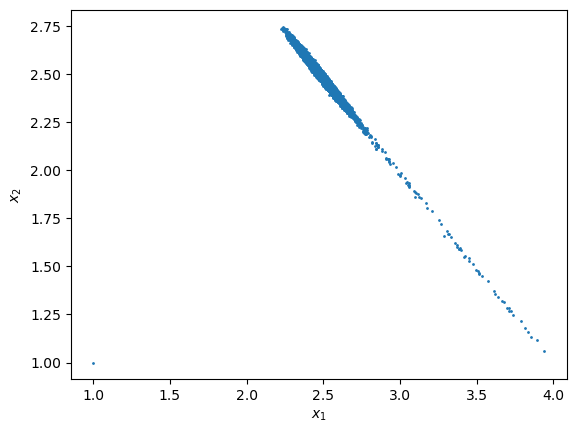

In [5]:
import numpy as np
import matplotlib.pyplot as plt

chain_length = 50000

y = 5
mu1 = 0

mu2 = 0
sig1 = 0.1
sig2 = 0.1
sig_y = 0.01
x1_chain = np.zeros(chain_length)
x2_chain = np.zeros(chain_length)
x1_chain[0] = 1
x2_chain[0] = 1

# Define mu, sig for 1 and 2 and sample randomly from full conditionals using updated samples from each loop
for n in range(1, chain_length):
    mu_x1 = (y * sig1 ** 2 + mu1 * sig_y ** 2 - x2_chain[n - 1] * sig1 ** 2) / (sig_y ** 2 + sig1 ** 2)
    sig_x1 = (sig_y ** 2 * sig1 ** 2) / (sig_y ** 2 + sig1 ** 2)
    x1_chain[n] = np.random.normal(mu_x1, np.sqrt(sig_x1))
    mu_x2 = (y * sig2 ** 2 + mu2 * sig_y ** 2 - x1_chain[n] * sig2 ** 2) / (sig_y ** 2 + sig2 ** 2)
    sig_x2 = (sig_y ** 2 * sig2 ** 2) / (sig_y ** 2 + sig2 ** 2)
    x2_chain[n] = np.random.normal(mu_x2, np.sqrt(sig_x2))

plt.scatter(x1_chain, x2_chain, s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

**Why does the posterior look like this?**

The samples $x_1, x_2$ from the posterior seem to be linked approximately by the relationship
$x_2 = 5 - x_1$, which is equivalent to $x_2 + x_1 = 5$.
This makes sense looking at the conditional distribution of $y \mid x_1, x_2$, since the mean of this distribution is $x_1 + x_2$, and since $y = 5$ here, we'd expect the posterior to give samples which satisfy this relationship.
Also, since the prior distributions of $x_1$ and $x_2$ are identical here, i.e. they both follow a Gaussian with mean 0 and standard deviation 0.1, we can see that the graph appears to converge to approximately $x_1 = x_2 = 2.5$, lining up with the initial relationship we discussed.
